In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np
import sklearn
from sklearn import preprocessing
import datetime
import plotly.express as px
import matplotlib.pyplot as plt

drive = drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
base = pd.read_excel("/content/drive/Shareddrives/grupo5_modulo3/Everymind | Grupo 5.xlsx", "Everymind")
reconhecimento = pd.read_excel("/content/drive/Shareddrives/grupo5_modulo3/Everymind | Grupo 5.xlsx", "Reconhecimento")
ambiente = pd.read_excel("/content/drive/Shareddrives/grupo5_modulo3/Everymind | Grupo 5.xlsx", "Ambiente de Trabalho 27.07")





/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
base



,Matricula,Nome Completo,Dt Admissao,Dt Saida,Tipo Saida,Cargo,Salario Mês,Dt Nascimento,Genero,Etnia,Estado Civil,Escolaridade,Estado,Cidade,Area,Idade
0,2.0,Pessoa Colaboradora 247,2015-02-02 00:00:00,NaT,NaN,Gerente Sr,9914.4,1992-01-25,Masculino,Branca,Solteiro,Graduação,SP,São Paulo,CPG & Retail,30
1,3.0,Pessoa Colaboradora 92,26/03/2015,NaT,NaN,Gerente Sr,8250.0,1991-08-03,Masculino,Branca,Solteiro,Graduação,SP,Osasco,CPG & Retail,31
2,4.0,Pessoa Colaboradora 42,2015-04-05 00:00:00,NaT,NaN,Arquiteto Sr,9914.4,1988-03-05,Masculino,Branca,Solteiro,Graduação,SP,São Paulo,Education,34
3,7.0,Pessoa Colaboradora 291,2015-09-01 00:00:00,2021-10-29,Pedido de Demissão,Arquiteto,7000.0,1986-08-31,Masculino,Parda,Solteiro,Graduação,SP,São Paulo,Core & Industrias,36
4,8.0,Pessoa Colaboradora 412,2015-12-07 00:00:00,2020-05-29,Pedido de Demissão,Dev Pl,2750.0,1994-06-27,Masculino,Parda,Solteiro,Graduação,SP,São Paulo,CPG & Retail,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,526.0,Pessoa Colaboradora 384,2022-07-18 00:00:00,2022-07-25,Rescisao Contrato Exp - Pedido,Dev Jr,1500.0,1993-07-15,Feminino,Parda,Solteiro,Pós Graduação,PR,Colombo,Integration,29
471,527.0,Pessoa Colaboradora 156,18/07/2022,NaT,NaN,Arquiteto,7000.0,1981-08-16,Masculino,Parda,Casado,Superior incompleto,SP,Guarulhos,Mkt Cloud,41
472,528.0,Pessoa Colaboradora 177,18/07/2022,NaT,NaN,Dev Jr,1750.0,1991-12-05,Masculino,Parda,Solteiro,Pós Graduação,DF,Brasília,Integration,30
473,529.0,Pessoa Colaboradora 263,18/07/2022,NaT,NaN,Dev Pl,2750.0,1990-01-18,Masculino,Parda,Solteiro,Superior incompleto,MG,Unaí,Commerce,32


In [ ]:
reconhecimento

,Matricula,Codinome,Situação,Data de Admissão,Data Vigência,Novo Cargo,Novo Salario,Motivo,Alterou Função
0,2.0,Pessoa Colaboradora 247,Ativo,2015-02-02,2020-07-01,Arquiteto,5200.000,PROMOÇÃO,Sim
1,2.0,Pessoa Colaboradora 247,Ativo,2015-02-02,2020-11-01,Arquiteto,6000.000,MÉRITO,Não
2,2.0,Pessoa Colaboradora 247,Ativo,2015-02-02,2021-08-01,Arquiteto,7000.000,MÉRITO,Não
3,2.0,Pessoa Colaboradora 247,Ativo,2015-02-02,2021-11-01,Gerente Sr,9000.000,PROMOÇÃO,Sim
4,3.0,Pessoa Colaboradora 92,Ativo,2015-03-26,2020-07-01,Arquiteto,5200.000,PROMOÇÃO,Sim
...,...,...,...,...,...,...,...,...,...
334,447.0,Pessoa Colaboradora 274,Ativo,2020-12-23,2022-04-01,Dev Jr,1716.480,MÉRITO,Não
335,448.0,Pessoa Colaboradora 279,Ativo,2021-05-26,2022-02-01,Dev Pl,3371.370,MÉRITO,Não
336,448.0,Pessoa Colaboradora 279,Ativo,2021-05-26,2022-04-01,Funcional Pl,3491.660,MÉRITO,Não
337,460.0,Pessoa Colaboradora 267,Ativo,2020-12-23,2021-11-01,Dev Jr,1454.995,PROMOÇÃO,Sim


In [ ]:
ambiente

,Divisao,Pilar,Pontuação,Fator,Pontuação.1,Pergunta,Pulou,Muito Insatisfeito,Insatisfeito,Neutro,Satisfeito,Muito Satisfeito,Taxa de Confiabilidade
0,Vendas,Relacionamento com a equipe,"8,11",Colaboração,"8,33",A colaboração com colegas de outras equipes é ...,NaN,NaN,NaN,NaN,NaN,100%,Muito Baixo
1,AMS&PS,Relacionamento com a equipe,"8,36",Colaboração,"8,58",A colaboração com colegas de outras equipes é ...,NaN,NaN,12.5%,NaN,37.5%,50%,Baixo
2,Commerce,Relacionamento com a equipe,"8,66",Colaboração,9,A colaboração com colegas de outras equipes é ...,20%,NaN,10%,NaN,NaN,70%,Médio
3,CPG & Retail II,Relacionamento com a equipe,"8,71",Colaboração,"8,69",A colaboração com colegas de outras equipes é ...,NaN,NaN,20%,NaN,NaN,80%,Baixo
4,Core & Industrias I,Relacionamento com a equipe,"8,8",Colaboração,"8,93",A colaboração com colegas de outras equipes é ...,NaN,NaN,NaN,NaN,62.5%,37.5%,Muito Baixo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689,Everymind,Relacionamento com o gestor,"9,05",Confiança no gestor,"9,44",Sinto que meu gestor direto se importa comigo ...,NaN,NaN,NaN,NaN,20%,80%,Muito Baixo
1690,People & Culture,Crescimento pessoal,"8,89",Desenvolvimento Profissional,"8,57",Você tem oportunidade de crescimento na empresa?,NaN,NaN,NaN,50%,NaN,50%,Baixo
1691,Analytics & Integration,Crescimento pessoal,"8,99",Desenvolvimento Profissional,"8,69",Você tem oportunidade de crescimento na empresa?,16.67%,NaN,NaN,16.67%,33.33%,33.33%,Baixo
1692,Core & Industrias II,Crescimento pessoal,"9,04",Desenvolvimento Profissional,"8,75",Você tem oportunidade de crescimento na empresa?,NaN,NaN,NaN,6.25%,25%,68.75%,Baixo


##Pré processamento dos dados


---
- Retirar dados que não serão usados
- Limpeza de dados nulos 

- Criação de label e hot in coder para variáveis categóricas 

In [ ]:

base = base.drop(['Nome Completo'], axis=1)
base = base.drop(['Etnia'], axis=1)


In [ ]:
baseN = base.drop(['Cidade','Area','Dt Admissao','Dt Saida','Dt Nascimento'], axis=1)

In [ ]:
rec = reconhecimento.drop(['Alterou Função', 'Codinome','Data de Admissão','Data Vigência'], axis=1) 

In [ ]:
ambi = ambiente.drop(['Pontuação.1','Pergunta','Pulou','Muito Insatisfeito', 'Insatisfeito','Neutro','Satisfeito','Muito Satisfeito','Taxa de Confiabilidade'], axis=1)

In [ ]:
baseN

,Matricula,Tipo Saida,Cargo,Salario Mês,Genero,Estado Civil,Escolaridade,Estado,Idade
0,2.0,NaN,Gerente Sr,9914.4,Masculino,Solteiro,Graduação,SP,30
1,3.0,NaN,Gerente Sr,8250.0,Masculino,Solteiro,Graduação,SP,31
2,4.0,NaN,Arquiteto Sr,9914.4,Masculino,Solteiro,Graduação,SP,34
3,7.0,Pedido de Demissão,Arquiteto,7000.0,Masculino,Solteiro,Graduação,SP,36
4,8.0,Pedido de Demissão,Dev Pl,2750.0,Masculino,Solteiro,Graduação,SP,28
...,...,...,...,...,...,...,...,...,...
470,526.0,Rescisao Contrato Exp - Pedido,Dev Jr,1500.0,Feminino,Solteiro,Pós Graduação,PR,29
471,527.0,NaN,Arquiteto,7000.0,Masculino,Casado,Superior incompleto,SP,41
472,528.0,NaN,Dev Jr,1750.0,Masculino,Solteiro,Pós Graduação,DF,30
473,529.0,NaN,Dev Pl,2750.0,Masculino,Solteiro,Superior incompleto,MG,32


##Label Encoder 
---
###Legendas:

##### Escolaridade
- 0: Ensino médio
- 1: Ensino médio incompleto
- 2: Graduação
- 3: Mestrado
- 4: Pós graduação
- 5: Superior incompleto
- 6: Técnico





In [ ]:

label = preprocessing.LabelEncoder()
baseN['Escolaridade '] = label.fit_transform(baseN['Escolaridade '])
rec['Situação'] = label.fit_transform(rec['Situação'])

##Hot Encoder

In [ ]:
hotGeral = pd.get_dummies(baseN, columns= ['Estado','Genero','Estado Civil','Cargo'],)

In [ ]:
hotGeral = hotGeral.drop(['Matricula','Tipo Saida','Salario Mês','Escolaridade ','Idade'],axis=1)

###Criação da coluna tempo de casa

In [ ]:


base['Dt Admissao'] = pd.to_datetime(base['Dt Admissao'])

houseTime = []
colaboratorStatus = []

for ind in base.index:
  if base['Dt Saida'][ind]:
    houseTime.append((base['Dt Saida'][ind] - base['Dt Admissao'][ind]).days)
  else:
    houseTime.append(0)

for i in base.index:
  if pd.isnull(base['Dt Saida'][i]):
    colaboratorStatus.append(1) # Nao saiu
  else:
    colaboratorStatus.append(0) # Saiu

base['Tempo de casa'], base['Situacao'] = houseTime, colaboratorStatus

base[base['Dt Saida'].notna()].sort_values('Tempo de casa', ascending=False)

,Matricula,Dt Admissao,Dt Saida,Tipo Saida,Cargo,Salario Mês,Dt Nascimento,Genero,Estado Civil,Escolaridade,Estado,Cidade,Area,Idade,Tempo de casa,Situacao
10,20.0,2009-04-01,2021-10-29,Pedido de Demissão,Dev Especialista,4406.965,1981-06-16,Masculino,Solteiro,Graduação,SP,Santos,AMS,41,4594.0,0
56,90.0,2015-05-04,2022-05-20,Pedido de Demissão,Dev Sr,4660.530,1993-06-10,Masculino,Solteiro,Graduação,SP,São Paulo,Analytics,29,2573.0,0
57,91.0,2015-09-21,2022-05-03,Pedido de Demissão,Arquiteto,7772.155,1985-10-25,Masculino,Casado,Graduação,SP,Santa Bárbara D'Oeste,Analytics,36,2416.0,0
3,7.0,2015-09-01,2021-10-29,Pedido de Demissão,Arquiteto,7000.000,1986-08-31,Masculino,Solteiro,Graduação,SP,São Paulo,Core & Industrias,36,2250.0,0
5,9.0,2015-12-07,2021-11-12,Pedido de Demissão,Arquiteto,6500.000,1988-07-07,Masculino,Solteiro,Graduação,SP,São Paulo,Core & Industrias,34,2167.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,413.0,2022-03-16,2022-04-01,Rescisao Contrato Exp - Dispensa,Arquiteto,7250.000,1982-08-04,Masculino,Solteiro,Graduação,SP,São Paulo,Core & Industrias,40,16.0,0
433,489.0,2022-06-13,2022-06-20,Rescisao Contrato Exp - Pedido,Dev Especialista,6000.000,1977-02-10,Masculino,Casado,Pós Graduação,RS,Porto Alegre,Core & Industrias,45,7.0,0
470,526.0,2022-07-18,2022-07-25,Rescisao Contrato Exp - Pedido,Dev Jr,1500.000,1993-07-15,Feminino,Solteiro,Pós Graduação,PR,Colombo,Integration,29,7.0,0
159,205.0,2021-03-01,2021-03-05,Rescisao Contrato Exp - Pedido,Dev Pl,2250.000,1991-08-14,Masculino,Solteiro,Graduação,SP,São Paulo,Analytics,31,4.0,0


In [ ]:
baseRec = pd.merge(baseN,rec, on= 'Matricula')

In [ ]:
baseRec = baseRec.drop(['Tipo Saida'],axis=1)

In [ ]:
baseRec

,Matricula,Cargo,Salario Mês,Genero,Estado Civil,Escolaridade,Estado,Idade,Situação,Novo Cargo,Novo Salario,Motivo
0,2.0,Gerente Sr,9914.40,Masculino,Solteiro,2,SP,30,1,Arquiteto,5200.000,PROMOÇÃO
1,2.0,Gerente Sr,9914.40,Masculino,Solteiro,2,SP,30,1,Arquiteto,6000.000,MÉRITO
2,2.0,Gerente Sr,9914.40,Masculino,Solteiro,2,SP,30,1,Arquiteto,7000.000,MÉRITO
3,2.0,Gerente Sr,9914.40,Masculino,Solteiro,2,SP,30,1,Gerente Sr,9000.000,PROMOÇÃO
4,3.0,Gerente Sr,8250.00,Masculino,Solteiro,2,SP,31,1,Arquiteto,5200.000,PROMOÇÃO
...,...,...,...,...,...,...,...,...,...,...,...,...
333,447.0,Dev Jr,1716.48,Masculino,Solteiro,6,RS,36,1,Dev Jr,1716.480,MÉRITO
334,448.0,Funcional Pl,3491.66,Masculino,Solteiro,6,SP,24,1,Dev Pl,3371.370,MÉRITO
335,448.0,Funcional Pl,3491.66,Masculino,Solteiro,6,SP,24,1,Funcional Pl,3491.660,MÉRITO
336,460.0,Dev Jr,1716.48,Masculino,Solteiro,6,SC,30,1,Dev Jr,1454.995,PROMOÇÃO


###Tratamento de dados 
- Retirada da coluna tempo de casa e complementar valores nan com a mediana

In [ ]:
tempoCasa = base['Tempo de casa']
mediana = tempoCasa.median()
tempoCasa.fillna(mediana, inplace=True)

In [ ]:
tempoCasa

0       261.0
1       261.0
2       261.0
3      2250.0
4      1635.0
        ...  
470       7.0
471     261.0
472     261.0
473     261.0
474     261.0
Name: Tempo de casa, Length: 475, dtype: float64

In [ ]:
Geral = pd.concat([baseN,tempoCasa],axis=1)

In [ ]:
Geral = Geral.drop(['Tipo Saida'],axis=1)

In [ ]:
Geral

,Matricula,Cargo,Salario Mês,Genero,Estado Civil,Escolaridade,Estado,Idade,Tempo de casa
0,2.0,Gerente Sr,9914.4,Masculino,Solteiro,2,SP,30,261.0
1,3.0,Gerente Sr,8250.0,Masculino,Solteiro,2,SP,31,261.0
2,4.0,Arquiteto Sr,9914.4,Masculino,Solteiro,2,SP,34,261.0
3,7.0,Arquiteto,7000.0,Masculino,Solteiro,2,SP,36,2250.0
4,8.0,Dev Pl,2750.0,Masculino,Solteiro,2,SP,28,1635.0
...,...,...,...,...,...,...,...,...,...
470,526.0,Dev Jr,1500.0,Feminino,Solteiro,5,PR,29,7.0
471,527.0,Arquiteto,7000.0,Masculino,Casado,6,SP,41,261.0
472,528.0,Dev Jr,1750.0,Masculino,Solteiro,5,DF,30,261.0
473,529.0,Dev Pl,2750.0,Masculino,Solteiro,6,MG,32,261.0


In [ ]:
# hotGeral = hotGeral.drop(['Matricula','Salario Mês','Escolaridade ','Idade'],axis=1)

In [ ]:
Situacao = base['Situacao']

In [ ]:
Situacao.value_counts()

1    284
0    191
Name: Situacao, dtype: int64

In [ ]:
Geral = pd.concat([Geral,Situacao], axis=1)

In [ ]:
Geral

,Matricula,Cargo,Salario Mês,Genero,Estado Civil,Escolaridade,Estado,Idade,Tempo de casa,Situacao
0,2.0,Gerente Sr,9914.4,Masculino,Solteiro,2,SP,30,261.0,1
1,3.0,Gerente Sr,8250.0,Masculino,Solteiro,2,SP,31,261.0,1
2,4.0,Arquiteto Sr,9914.4,Masculino,Solteiro,2,SP,34,261.0,1
3,7.0,Arquiteto,7000.0,Masculino,Solteiro,2,SP,36,2250.0,0
4,8.0,Dev Pl,2750.0,Masculino,Solteiro,2,SP,28,1635.0,0
...,...,...,...,...,...,...,...,...,...,...
470,526.0,Dev Jr,1500.0,Feminino,Solteiro,5,PR,29,7.0,0
471,527.0,Arquiteto,7000.0,Masculino,Casado,6,SP,41,261.0,1
472,528.0,Dev Jr,1750.0,Masculino,Solteiro,5,DF,30,261.0,1
473,529.0,Dev Pl,2750.0,Masculino,Solteiro,6,MG,32,261.0,1


In [ ]:
#snVars = ['Salario Mês','Idade','Tempo de casa']
snVars = ['Salario Mês','Idade']
nDf = Geral[snVars]
nDf


,Salario Mês,Idade
0,9914.4,30
1,8250.0,31
2,9914.4,34
3,7000.0,36
4,2750.0,28
...,...,...
470,1500.0,29
471,7000.0,41
472,1750.0,30
473,2750.0,32


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(nDf)

StandardScaler()

In [ ]:
scaler.transform(nDf)

array([[ 2.67057382e+00, -6.05324885e-02],
       [ 1.99515721e+00,  6.34025634e-02],
       [ 2.67057382e+00,  4.35207719e-01],
       [ 1.48790490e+00,  6.83077823e-01],
       [-2.36752972e-01, -3.08402593e-01],
       [ 1.28500397e+00,  4.35207719e-01],
       [ 6.76301195e-01, -6.05324885e-02],
       [-5.13266354e-01, -6.80207748e-01],
       [-2.97623250e-01, -3.08402593e-01],
       [ 1.08178602e-01, -8.04142800e-01],
       [ 4.35646494e-01,  1.30275308e+00],
       [ 3.34112080e+00,  1.17881803e+00],
       [-4.25950469e-02, -6.05324885e-02],
       [ 1.58935536e+00,  5.59142771e-01],
       [-1.14416387e-02,  6.34025634e-02],
       [ 3.71949806e-01,  1.87337615e-01],
       [-9.13724295e-02,  3.03784381e+00],
       [ 5.25064932e-01,  1.30275308e+00],
       [ 1.00143725e-01, -1.84467541e-01],
       [ 3.71949806e-01,  2.29423350e+00],
       [ 5.64963370e-01,  1.05488298e+00],
       [ 6.58932876e-01, -4.32337645e-01],
       [-5.15585511e-01, -6.80207748e-01],
       [ 6.

In [ ]:
scaler.fit_transform(nDf)

array([[ 2.67057382e+00, -6.05324885e-02],
       [ 1.99515721e+00,  6.34025634e-02],
       [ 2.67057382e+00,  4.35207719e-01],
       [ 1.48790490e+00,  6.83077823e-01],
       [-2.36752972e-01, -3.08402593e-01],
       [ 1.28500397e+00,  4.35207719e-01],
       [ 6.76301195e-01, -6.05324885e-02],
       [-5.13266354e-01, -6.80207748e-01],
       [-2.97623250e-01, -3.08402593e-01],
       [ 1.08178602e-01, -8.04142800e-01],
       [ 4.35646494e-01,  1.30275308e+00],
       [ 3.34112080e+00,  1.17881803e+00],
       [-4.25950469e-02, -6.05324885e-02],
       [ 1.58935536e+00,  5.59142771e-01],
       [-1.14416387e-02,  6.34025634e-02],
       [ 3.71949806e-01,  1.87337615e-01],
       [-9.13724295e-02,  3.03784381e+00],
       [ 5.25064932e-01,  1.30275308e+00],
       [ 1.00143725e-01, -1.84467541e-01],
       [ 3.71949806e-01,  2.29423350e+00],
       [ 5.64963370e-01,  1.05488298e+00],
       [ 6.58932876e-01, -4.32337645e-01],
       [-5.15585511e-01, -6.80207748e-01],
       [ 6.

In [ ]:
nDf_norma = scaler.transform(nDf)

In [ ]:
nDfpad = pd.DataFrame(nDf_norma, columns = nDf.columns)


In [ ]:
nDfpad

,Salario Mês,Idade
0,2.670574,-0.060532
1,1.995157,0.063403
2,2.670574,0.435208
3,1.487905,0.683078
4,-0.236753,-0.308403
...,...,...
470,-0.744005,-0.184468
471,1.487905,1.302753
472,-0.642555,-0.060532
473,-0.236753,0.187338


In [ ]:
mod = pd.concat([nDfpad,hotGeral],axis=1)

In [ ]:
mod

,Salario Mês,Idade,Estado_BA,Estado_CE,Estado_DF,Estado_GO,Estado_MA,Estado_MG,Estado_MS,Estado_PA,...,Cargo_Gerente,Cargo_Gerente CS Sr,Cargo_Gerente PV,Cargo_Gerente Sr,Cargo_Gerente Vendas I,Cargo_Gerente Vendas II,Cargo_Gerente Vendas III,Cargo_Trainee - Dev,Cargo_Trainee - Funcional,Cargo_Vice Presidente
0,2.670574,-0.060532,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1.995157,0.063403,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2.670574,0.435208,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.487905,0.683078,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.236753,-0.308403,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,-0.744005,-0.184468,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
471,1.487905,1.302753,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
472,-0.642555,-0.060532,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
473,-0.236753,0.187338,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=9)
pca_res = pca.fit_transform(mod)

In [ ]:
pca.explained_variance_ratio_

array([0.37087745, 0.11910947, 0.09085118, 0.07839228, 0.04732201,
       0.03920333, 0.03137544, 0.02812545, 0.02251232])

In [ ]:
df = pd.DataFrame({'var': pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']})

In [ ]:
df

,var,PC
0,0.370877,PC1
1,0.119109,PC2
2,0.090851,PC3
3,0.078392,PC4
4,0.047322,PC5
5,0.039203,PC6
6,0.031375,PC7
7,0.028125,PC8
8,0.022512,PC9


In [ ]:
dfp = pd.DataFrame(pca_res)

In [ ]:
dfp

,0,1,2,3,4,5,6,7,8
0,1.742806,2.135710,0.071829,-0.306723,-0.189415,-0.173784,-0.062336,-0.238981,-0.089851
1,1.369822,1.589614,0.096518,-0.380840,-0.205583,-0.248526,-0.066731,-0.195584,-0.118505
2,2.072975,1.804176,0.111971,-0.396051,-0.168664,-0.259802,-0.091749,-0.313863,-0.149527
3,1.554231,0.509282,-0.742438,0.378047,-0.075199,-0.009438,0.011191,-0.546894,-0.086087
4,-0.329084,-0.068229,-0.979688,0.507811,0.077022,-0.170424,-0.610851,0.209406,-0.215014
...,...,...,...,...,...,...,...,...,...
470,-0.693615,-0.619485,0.260207,1.083152,1.078762,-0.009370,0.829278,-0.078112,-0.109434
471,2.115240,0.107061,-0.163789,-0.204908,-0.432349,0.492097,0.205969,0.318949,-0.216308
472,-0.615557,-0.214190,0.136209,-0.743965,0.661033,-0.499877,0.745404,0.195900,-0.182125
473,-0.124995,-0.071396,0.028522,-0.753428,0.975441,-0.321431,-0.595958,0.516698,-0.227306


In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
x = dfp
y = Geral['Situacao']
ros = RandomOverSampler(random_state = 32)
X_ros_res, y_ros_res = ros.fit_resample(x, y)

In [ ]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame()
# X = pd.concat([X,nDfpad['Salario Mês']], axis=1)
# X = pd.concat([X,nDfpad['Tempo de casa']],axis=1)
# X = pd.concat([X,nDfpad['Idade']],axis=1)
#X = pd.concat([X,dfp],axis=1)
#Y = Geral['Situacao']
X = X_ros_res 
Y = y_ros_res
x_train, x_test, y_train, y_test = train_test_split(X,Y,
                                                    test_size = 0.3,
                                                    random_state = 2)


In [ ]:
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score

svmClf = svm.SVC(kernel='linear', probability=True) # Linear Kernel
svmClf.fit(x_train, y_train)

y_pred = svmClf.predict(x_test)
y_trei = svmClf.predict(x_train)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
y_true = y_test
cm = confusion_matrix(y_true, y_pred)
cm

array([[92,  0],
       [ 3, 76]])

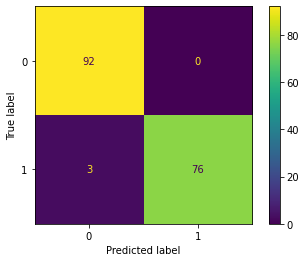

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

In [ ]:
print('Acuracidade (treino): ', accuracy_score(y_train, y_trei))
print('Acuracidade (teste): ', accuracy_score(y_test, y_pred))


Acuracidade (treino):  0.9924433249370277
Acuracidade (teste):  0.9824561403508771


In [ ]:
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))

Precision:  1.0
Recall:  0.9620253164556962


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
modelGS = GridSearchCV(svmClf, parameters)

In [ ]:
modelGS.fit(x_train, y_train)
modelGS.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}